<a href="https://colab.research.google.com/github/Lyhnttt/sohoavaquantrithongtinso/blob/main/KiemtraSoHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())


  Student_ID     Course  Score  Attendance (%) Study_Hours  Gender    Campus
0       S001       Math     85              90           5    Male  Campus_A
1       S002    Physics     85              85           4  Female  Campus_B
2       S003  Chemistry     78              70           4  Female  Campus_A
3       S004       Math     92              95           6  Female  Campus_C
4       S005    Physics     65              60           3    Male  Campus_B


In [ ]:
#Câu 1
import pandas as pd
import numpy as np

missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    16.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64


Text(0.5, 0, 'Score')

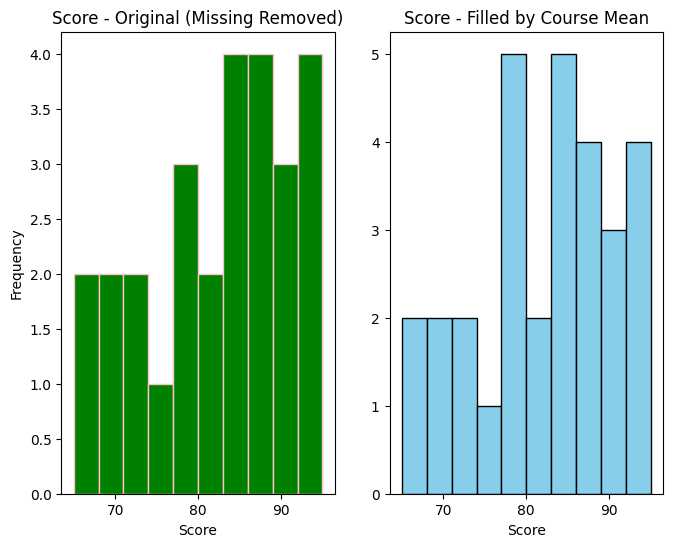

In [ ]:
#Câu 2
import matplotlib.pyplot as plt
df['Score_filled_by_course'] = df['Score']
course_mean = df.groupby('Course')['Score'].mean()
df['Score_filled_by_course'] = df.apply(
    lambda row: course_mean[row['Course']] if pd.isnull(row['Score']) else row['Score'],
    axis=1
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['Score'].dropna(), bins=10, color='green', edgecolor='pink')
plt.title('Score - Original (Missing Removed)')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Score_filled_by_course'], bins=10, color='skyblue', edgecolor='black')
plt.title('Score - Filled by Course Mean')
plt.xlabel('Score')


In [ ]:
#Câu 3
study_hours_clean = df['Study_Hours'].dropna()
std_study_hours = np.std(study_hours_clean, ddof=0)

print(f"Độ lệch chuẩn của Study_Hours là: {std_study_hours:.2f}")

Độ lệch chuẩn của Study_Hours là: 1.21


In [ ]:
#Câu 4
campus_correlation = {}

for campus, group in df.groupby('Campus'):
    sub_df = group[['Attendance (%)', 'Score']].dropna()
    if len(sub_df) > 1:
        corr = sub_df['Attendance (%)'].corr(sub_df['Score'])
        campus_correlation[campus] = corr
    else:
        campus_correlation[campus] = np.nan

for campus, corr in campus_correlation.items():
    print(f"Campus {campus}: Correlation = {corr:.2f}")


Campus Campus_A: Correlation = 0.90
Campus Campus_B: Correlation = 0.77
Campus Campus_C: Correlation = 0.95


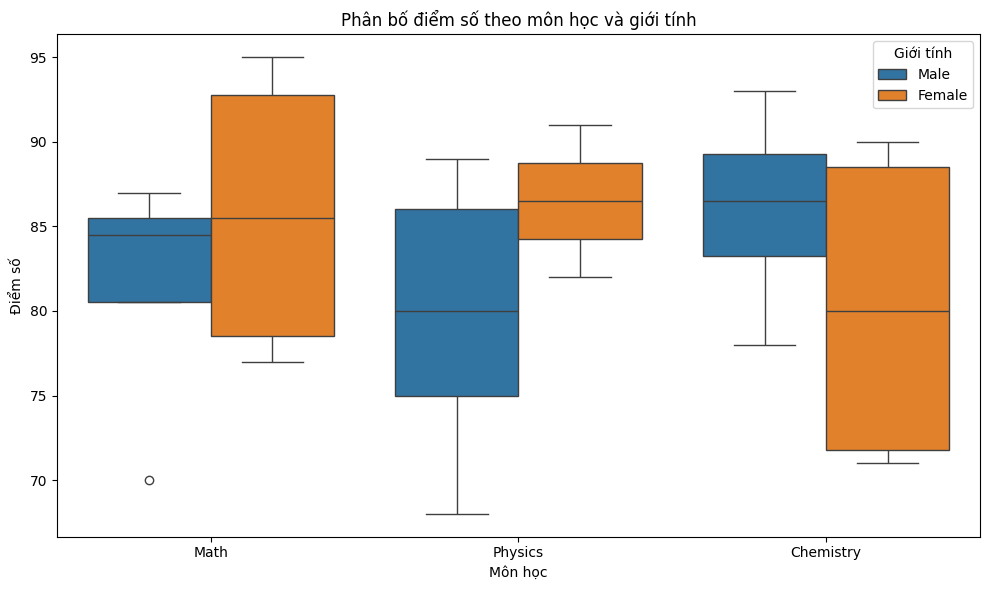

In [ ]:
#Câu 5
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Course", y="Score", hue="Gender")

plt.title("Phân bố điểm số theo môn học và giới tính")
plt.xlabel("Môn học")
plt.ylabel("Điểm số")
plt.legend(title="Giới tính")
plt.tight_layout()
plt.show()


In [ ]:
# Hàm xác định outlier bằng IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Áp dụng theo từng nhóm Course + Gender
df['is_outlier'] = df.groupby(['Course', 'Gender'])['Score'].transform(detect_outliers_iqr)
outliers = df[df['is_outlier'] == True]
print("Số lượng outlier:", len(outliers))
display(outliers[['Student_ID', 'Course', 'Gender', 'Score']])


Số lượng outlier: 1


,Student_ID,Course,Gender,Score
9,S010,Math,Male,70.0


In [ ]:
#Câu 6

df['Efficiency'] = df['Score'] / df['Study_Hours']
print(df[['Student_ID', 'Score', 'Study_Hours', 'Efficiency']].head(30))

top_eff = df.sort_values('Efficiency', ascending=False).head(1)
print(top_eff[['Student_ID', 'Course', 'Score', 'Study_Hours', 'Efficiency']])

   Student_ID  Score  Study_Hours  Efficiency
0        S001   85.0          5.0   17.000000
1        S002    NaN          4.0         NaN
2        S003   78.0          NaN         NaN
3        S004   92.0          6.0   15.333333
4        S005   65.0          3.0   21.666667
5        S006   88.0          5.0   17.600000
6        S007    NaN          4.0         NaN
7        S008   75.0          5.0   15.000000
8        S009   90.0          NaN         NaN
9        S010   70.0          3.0   23.333333
10       S011   82.0          4.0   20.500000
11       S012   85.0          6.0   14.166667
12       S013   95.0          7.0   13.571429
13       S014   68.0          3.0   22.666667
14       S015   83.0          5.0   16.600000
15       S016   77.0          4.0   19.250000
16       S017   89.0          NaN         NaN
17       S018   72.0          3.0   24.000000
18       S019   84.0          5.0   16.800000
19       S020   91.0          6.0   15.166667
20       S021   66.0          2.0 

In [ ]:
#Câu 7

mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

female_ratio = df.groupby('Course')['Gender'].apply(lambda x: (x == 'Female').mean())

print("Tỷ lệ sinh viên nữ trong từng môn học là:")
display(female_ratio)


Tỷ lệ sinh viên nữ trong từng môn học là:


,Gender
Course,
Chemistry,0.6
Math,0.6
Physics,0.5


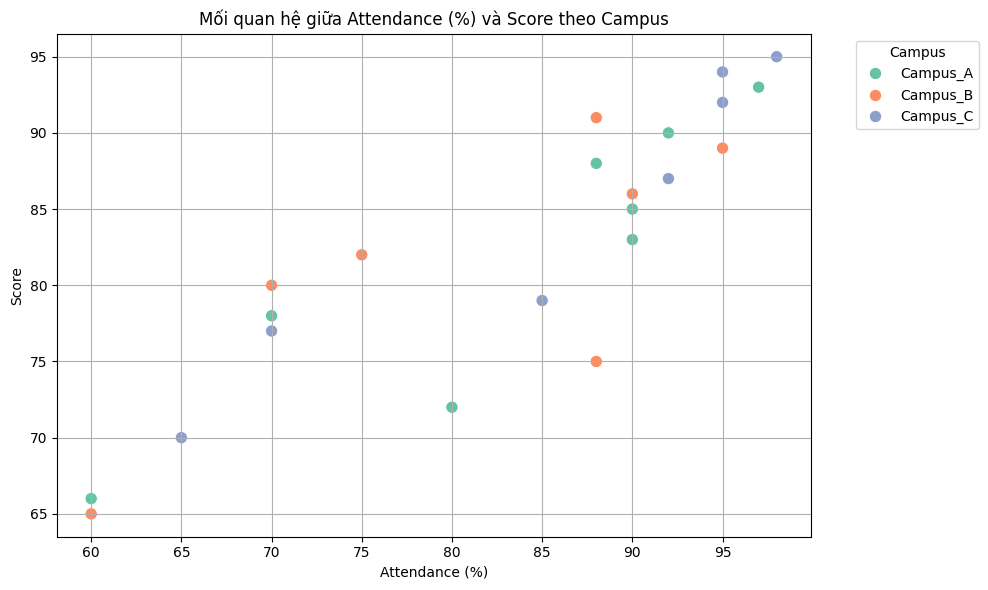

In [ ]:
#Câu 8
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attendance (%)', y='Score', hue='Campus', palette='Set2', s=80)
plt.title("Mối quan hệ giữa Attendance (%) và Score theo Campus")
plt.xlabel("Attendance (%)")
plt.ylabel("Score")
plt.legend(title="Campus", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Trung bình điểm số theo từng môn học:


,Score
Course,
Chemistry,81.400000
Math,84.777778
Physics,79.500000


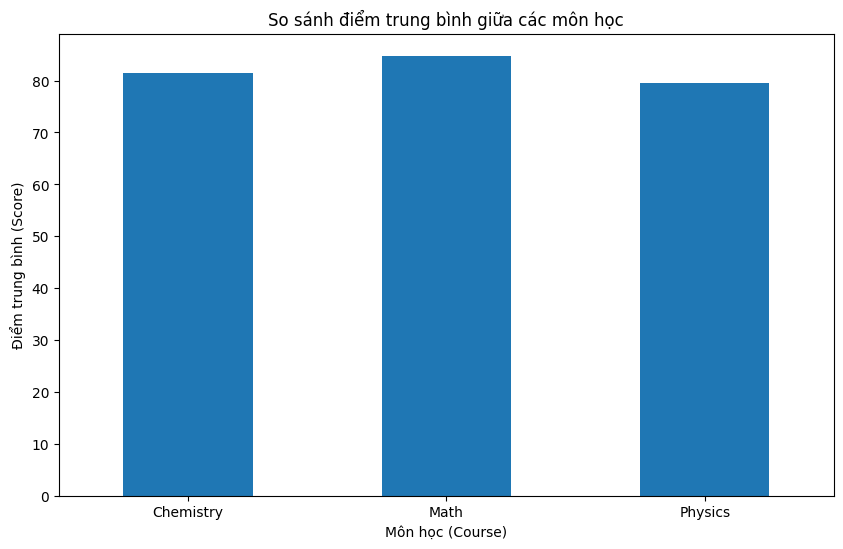

In [ ]:
#Câu 9
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))
avg_score_per_course = df.groupby('Course')['Score'].mean()
print("Trung bình điểm số theo từng môn học:")
display(avg_score_per_course)

avg_score_per_course.plot(kind='bar', figsize=(10, 6))
plt.title("So sánh điểm trung bình giữa các môn học")
plt.xlabel("Môn học (Course)")
plt.ylabel("Điểm trung bình (Score)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Câu 10
high_score_low_attendance = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]
print(f"Số lượng sinh viên có điểm cao nhưng chuyên cần thấp: {len(high_score_low_attendance)}")
display(high_score_low_attendance[['Student_ID', 'Course', 'Score', 'Attendance (%)']])


Số lượng sinh viên có điểm cao nhưng chuyên cần thấp: 0


,Student_ID,Course,Score,Attendance (%)


In [ ]:
#Câu 12

from scipy.stats import skew
score_skew = skew(df['Score'].dropna())
print(f"Skewness của Score: {score_skew:.4f}")

Skewness của Score: -0.4113


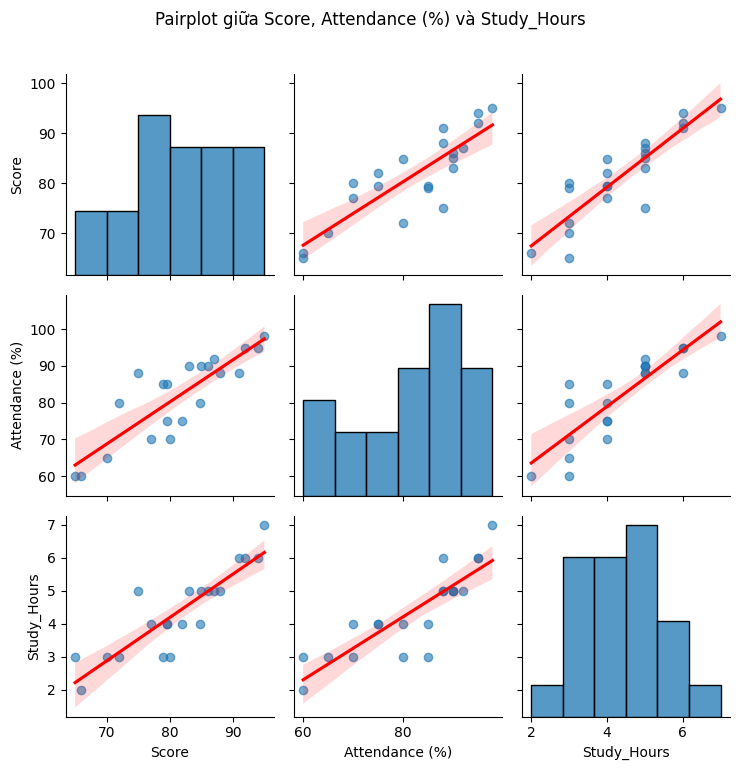

In [ ]:
#Câu 13
df_pair = df[['Score', 'Attendance (%)', 'Study_Hours']].dropna()
sns.pairplot(df_pair, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.suptitle("Pairplot giữa Score, Attendance (%) và Study_Hours", y=1.02)
plt.tight_layout()
plt.show()

Tỷ lệ sinh viên có điểm > 80 theo Campus:


,Score
Campus,
Campus_A,0.636364
Campus_B,0.400000
Campus_C,0.666667


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


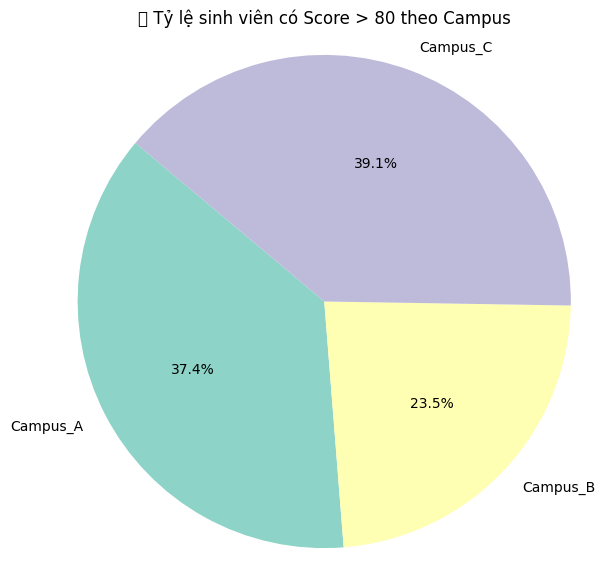

In [ ]:
#Câu 14
df_score = df[df['Score'].notna()]
score_above_80_ratio = df_score.groupby('Campus')['Score'].apply(lambda x: (x > 80).mean())
print("Tỷ lệ sinh viên có điểm > 80 theo Campus:")
display(score_above_80_ratio)

plt.figure(figsize=(7, 7))
colors = plt.get_cmap('Set3').colors
plt.pie(score_above_80_ratio, labels=score_above_80_ratio.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title("Tỷ lệ sinh viên có Score > 80 theo Campus")
plt.axis('equal')
plt.show()

In [ ]:
#Câu 15
# Hàm xác định sinh viên có điểm ngoài 2 độ lệch chuẩn
def identify_outliers(df):
    mean_score = df['Score'].mean()
    std_score = df['Score'].std()
    threshold_upper = mean_score + 2 * std_score
    threshold_lower = mean_score - 2 * std_score
    outliers = df[(df['Score'] < threshold_lower) | (df['Score'] > threshold_upper)]
    return outliers

# Xác định sinh viên có điểm ngoài 2 độ lệch chuẩn
outliers = identify_outliers(df)
print("Sinh viên có điểm ngoài 2 độ lệch chuẩn:")
print(outliers)


Sinh viên có điểm ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Score_filled_by_course, is_outlier, Efficiency, Score_z]
Index: []


In [ ]:
# câu 16

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# Phương pháp điền giá trị thiếu bằng KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = df.copy()
df_knn_imputed[['Attendance (%)', 'Study_Hours']] = knn_imputer.fit_transform(df_knn_imputed[['Attendance (%)', 'Study_Hours']])

# Phương pháp điền giá trị thiếu bằng trung vị
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = df.copy()
df_median_imputed[['Attendance (%)', 'Study_Hours']] = median_imputer.fit_transform(df_median_imputed[['Attendance (%)', 'Study_Hours']])

# In dữ liệu sau khi điền thiếu
print("\nDữ liệu sau khi điền giá trị thiếu bằng KNN Imputer:")
print(df_knn_imputed)

print("\nDữ liệu sau khi điền giá trị thiếu bằng trung vị:")
print(df_median_imputed)


Dữ liệu sau khi điền giá trị thiếu bằng KNN Imputer:
   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.500000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          3.6    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0  Female   
5        S006  Chemistry  88.000000            89.6          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          5.2  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.00000